In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import requests

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
data = pd.read_excel('./환경데이터(최종).xlsx')

In [4]:
data.drop(columns=['Unnamed: 0', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'], axis=1, inplace=True)

In [5]:
data.head()

,종목코드,종목명,종가,대비,등락률,상장시가총액,고유번호,업종코드,업종대분류,온실가스배출량,에너지사용량,매출액,온실가스배출량/매출액(tCO2/억원),에너지사용량/매출액(TJ/억원),온실가스 점수,에너지 점수,환경 점수
0,5930,삼성전자,77400,800,1.04,462061169,126380,264,제조업,12531900.0,177122.0,1.663112e+14,7.54,0.1065,70,80,75
1,660,SK하이닉스,106000,-1000,-0.93,77168251,164779,2612,제조업,4691884.0,80758.0,3.052499e+13,15.37,0.2646,70,80,75
2,35420,NAVER,451500,-1000,-0.22,74164923,266961,63120,정보통신업,77420.0,1398.0,4.126629e+12,1.88,0.0339,80,90,85
3,35720,카카오,154000,-2500,-1.60,68484900,258801,63120,정보통신업,76926.0,1585.0,1.779200e+12,4.32,0.0891,80,90,85
4,207940,삼성바이오로직스,951000,0,0.00,62922915,877059,21102,제조업,124807.0,2529.0,1.164777e+12,10.72,0.2171,70,80,75


In [6]:
co2 = data[['업종대분류', '온실가스배출량/매출액(tCO2/억원)']]

In [7]:
co2.head()

,업종대분류,온실가스배출량/매출액(tCO2/억원)
0,제조업,7.54
1,제조업,15.37
2,정보통신업,1.88
3,정보통신업,4.32
4,제조업,10.72


In [9]:
co2['업종대분류'].value_counts()

제조업                         107
금융 및 보험업                     34
도매 및 소매업                     22
정보통신업                        10
건설업                           6
전문, 과학 및 기술 서비스업              6
운수 및 창고업                      5
사업시설 관리, 사업 지원 및 임대 서비스업      3
전기, 가스, 증기 및 공기 조절 공급업        2
예술, 스포츠 및 여가관련 서비스업           2
농업, 임업 및 어업                   1
부동산업                          1
협회 및 단체, 수리 및 기타 개인 서비스업      1
Name: 업종대분류, dtype: int64

# 온실가스

### 제조업

In [13]:
co2_제조업 = co2[co2['업종대분류']=='제조업'].dropna()
co2_제조업

,업종대분류,온실가스배출량/매출액(tCO2/억원)
0,제조업,7.54
1,제조업,15.37
4,제조업,10.72
5,제조업,39.25
6,제조업,6.17
...,...,...
188,제조업,5.59
189,제조업,14.69
191,제조업,4.45
193,제조업,2.14


In [ ]:
co2_제조업_이상치제거 = co2_제조업.drop(co2_제조업[co2_제조업['온실가스배출량/매출액(tCO2/억원)']>30000], axis=0)

Text(0.5, 1.0, '온실가스 배출량 분포')

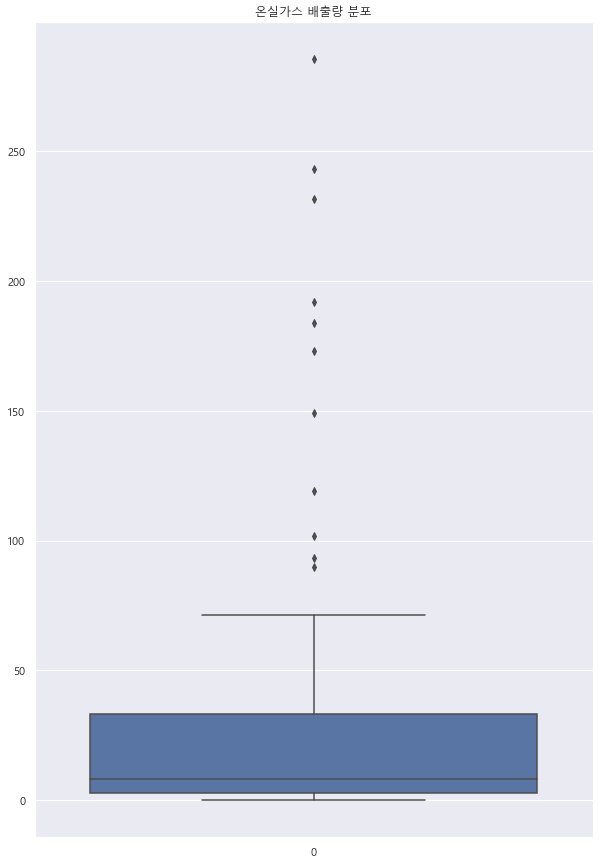

In [16]:
plt.figure(figsize = (10,15))
sns.boxplot(data=co2_제조업['온실가스배출량/매출액(tCO2/억원)'])
plt.title('온실가스 배출량 분포')

No handles with labels found to put in legend.


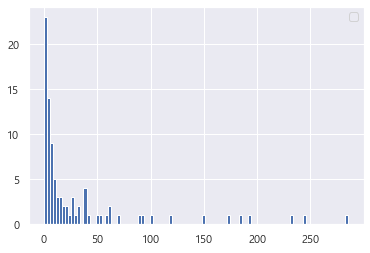

In [17]:
plt.hist(co2_제조업['온실가스배출량/매출액(tCO2/억원)'], bins=100)
plt.legend()
plt.show()

In [18]:
co2_제조업.describe()

,온실가스배출량/매출액(tCO2/억원)
count,90.000000
mean,33.192556
std,57.878802
min,0.010000
25%,2.720000
50%,8.000000
75%,33.157500
max,285.440000


In [20]:
co2_제조업.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 196
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   업종대분류                 90 non-null     object 
 1   온실가스배출량/매출액(tCO2/억원)  90 non-null     float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [21]:
np.percentile(co2_제조업['온실가스배출량/매출액(tCO2/억원)'], [20, 40, 60, 80], interpolation='midpoint')

array([ 2.29 ,  5.6  , 14.435, 40.835])

### 금융 및 보험업

In [22]:
co2_금융 = co2[co2['업종대분류']=='금융 및 보험업'].dropna()
co2_금융

,업종대분류,온실가스배출량/매출액(tCO2/억원)
18,금융 및 보험업,8.75
19,금융 및 보험업,5.39
20,금융 및 보험업,1.84
24,금융 및 보험업,0.23
29,금융 및 보험업,12.18
37,금융 및 보험업,0.06
44,금융 및 보험업,11.39
47,금융 및 보험업,0.37
59,금융 및 보험업,0.09
63,금융 및 보험업,198.13


No handles with labels found to put in legend.


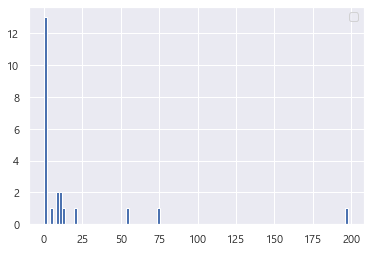

In [26]:
plt.hist(co2_금융['온실가스배출량/매출액(tCO2/억원)'], bins=100)
plt.legend()
plt.show()

In [27]:
np.percentile(co2_금융['온실가스배출량/매출액(tCO2/억원)'], [20, 40, 60, 80], interpolation='midpoint')

array([ 0.06 ,  0.195,  6.68 , 11.785])

### 도매 및 소매업

In [28]:
co2_도소매 = co2[co2['업종대분류']=='도매 및 소매업'].dropna()
co2_도소매

,업종대분류,온실가스배출량/매출액(tCO2/억원)
12,도매 및 소매업,0.45
35,도매 및 소매업,4.95
64,도매 및 소매업,3.66
70,도매 및 소매업,32137.04
91,도매 및 소매업,0.70
93,도매 및 소매업,2.98
100,도매 및 소매업,7.72
104,도매 및 소매업,0.85
106,도매 및 소매업,0.31
108,도매 및 소매업,20.37


No handles with labels found to put in legend.


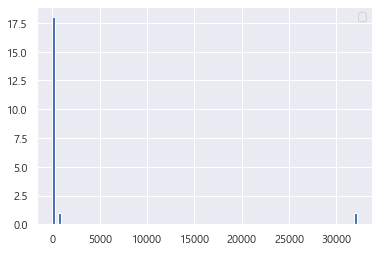

In [29]:
plt.hist(co2_도소매['온실가스배출량/매출액(tCO2/억원)'], bins=100)
plt.legend()
plt.show()

In [30]:
np.percentile(co2_도소매['온실가스배출량/매출액(tCO2/억원)'], [20, 40, 60, 80], interpolation='midpoint')

array([ 0.31 ,  0.7  ,  4.305, 10.145])

### 정보통신업

In [31]:
co2_정보 = co2[co2['업종대분류']=='정보통신업'].dropna()
co2_정보

,업종대분류,온실가스배출량/매출액(tCO2/억원)
2,정보통신업,1.88
3,정보통신업,4.32
17,정보통신업,8.85
27,정보통신업,0.60
28,정보통신업,2.09
52,정보통신업,10.46
166,정보통신업,18.04


No handles with labels found to put in legend.


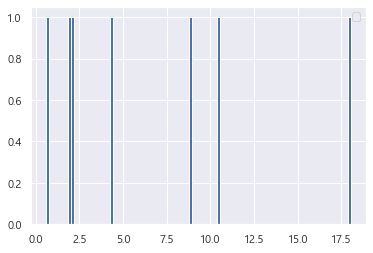

In [32]:
plt.hist(co2_정보['온실가스배출량/매출액(tCO2/억원)'], bins=100)
plt.legend()
plt.show()

In [33]:
np.percentile(co2_정보['온실가스배출량/매출액(tCO2/억원)'], [20, 40, 60, 80], interpolation='midpoint')

array([1.985, 3.205, 6.585, 9.655])

### 건설업

In [34]:
co2_건설업 = co2[co2['업종대분류']=='건설업'].dropna()
co2_건설업

,업종대분류,온실가스배출량/매출액(tCO2/억원)
55,건설업,0.81
80,건설업,1.22
98,건설업,0.77
119,건설업,3.13


In [35]:
np.percentile(co2_건설업['온실가스배출량/매출액(tCO2/억원)'], [20, 40, 60, 80], interpolation='midpoint')

array([0.79 , 1.015, 1.015, 2.175])

### 전문, 과학 및 기술 서비스업

In [36]:
co2_전문 = co2[co2['업종대분류']=='전문, 과학 및 기술 서비스업'].dropna()
co2_전문

,업종대분류,온실가스배출량/매출액(tCO2/억원)
66,"전문, 과학 및 기술 서비스업",1.17
113,"전문, 과학 및 기술 서비스업",0.24
132,"전문, 과학 및 기술 서비스업",255.12
153,"전문, 과학 및 기술 서비스업",4.66
173,"전문, 과학 및 기술 서비스업",0.12


In [39]:
np.percentile(co2_전문['온실가스배출량/매출액(tCO2/억원)'], [20, 40, 60, 80], interpolation='midpoint')

array([  0.18 ,   0.705,   2.915, 129.89 ])

# 에너지

In [40]:
energy = data[['업종대분류', '에너지사용량/매출액(TJ/억원)']]

In [42]:
energy.dropna(inplace=True)

<ipython-input-42-988546b77878>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy.dropna(inplace=True)


In [43]:
energy['업종대분류'].value_counts()

제조업                         86
금융 및 보험업                    24
도매 및 소매업                    19
정보통신업                        7
운수 및 창고업                     5
건설업                          4
전문, 과학 및 기술 서비스업             4
전기, 가스, 증기 및 공기 조절 공급업       2
농업, 임업 및 어업                  1
부동산업                         1
예술, 스포츠 및 여가관련 서비스업          1
협회 및 단체, 수리 및 기타 개인 서비스업     1
Name: 업종대분류, dtype: int64

### 제조업

In [44]:
energy_제조업 = energy[energy['업종대분류']=='제조업']
energy_제조업

,업종대분류,에너지사용량/매출액(TJ/억원)
0,제조업,0.1065
1,제조업,0.2646
4,제조업,0.2171
5,제조업,0.7316
6,제조업,0.1275
...,...,...
188,제조업,0.1042
189,제조업,0.2916
191,제조업,0.0958
193,제조업,0.0439


No handles with labels found to put in legend.


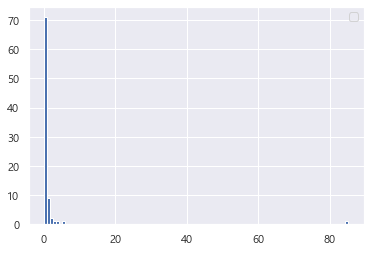

In [45]:
plt.hist(energy_제조업['에너지사용량/매출액(TJ/억원)'], bins=100)
plt.legend()
plt.show()

In [46]:
np.percentile(energy_제조업['에너지사용량/매출액(TJ/억원)'], [20, 40, 60, 80], interpolation='midpoint')

array([0.0506, 0.1268, 0.2646, 0.785 ])

### 금융 및 보험업

In [47]:
energy_금융 = energy[energy['업종대분류']=='금융 및 보험업']
energy_금융

,업종대분류,에너지사용량/매출액(TJ/억원)
18,금융 및 보험업,0.1651
19,금융 및 보험업,0.0132
20,금융 및 보험업,0.0386
24,금융 및 보험업,0.0031
29,금융 및 보험업,0.2576
37,금융 및 보험업,0.0013
44,금융 및 보험업,0.2332
47,금융 및 보험업,0.0004
59,금융 및 보험업,0.0019
62,금융 및 보험업,5.9194


No handles with labels found to put in legend.


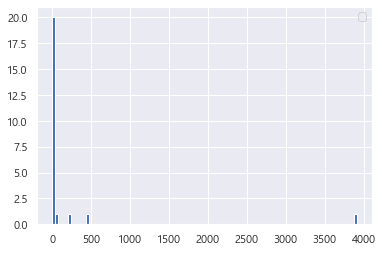

In [48]:
plt.hist(energy_금융['에너지사용량/매출액(TJ/억원)'], bins=100)
plt.legend()
plt.show()

In [49]:
np.percentile(energy_금융['에너지사용량/매출액(TJ/억원)'], [20, 40, 60, 80], interpolation='midpoint')

array([1.20000e-03, 9.86000e-02, 2.45400e-01, 3.68875e+00])

### 도매 및 소매업

In [50]:
energy_도소매 = energy[energy['업종대분류']=='도매 및 소매업']
energy_도소매

,업종대분류,에너지사용량/매출액(TJ/억원)
12,도매 및 소매업,0.0095
35,도매 및 소매업,0.0755
64,도매 및 소매업,0.0749
70,도매 및 소매업,4916.8681
91,도매 및 소매업,0.0142
93,도매 및 소매업,0.0000
100,도매 및 소매업,0.1523
106,도매 및 소매업,0.0064
108,도매 및 소매업,106.3397
110,도매 및 소매업,4500.7689


No handles with labels found to put in legend.


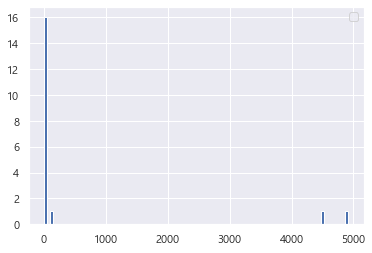

In [51]:
plt.hist(energy_도소매['에너지사용량/매출액(TJ/억원)'], bins=100)
plt.legend()
plt.show()

In [52]:
np.percentile(energy_도소매['에너지사용량/매출액(TJ/억원)'], [20, 40, 60, 80], interpolation='midpoint')

array([0.00385, 0.01185, 0.10145, 1.31585])

### 정보통신업

In [53]:
energy_정보 = energy[energy['업종대분류']=='정보통신업']
energy_정보

,업종대분류,에너지사용량/매출액(TJ/억원)
2,정보통신업,0.0339
3,정보통신업,0.0891
17,정보통신업,0.1819
27,정보통신업,0.0128
28,정보통신업,0.0428
52,정보통신업,0.2154
166,정보통신업,0.3518


In [54]:
np.percentile(energy_정보['에너지사용량/매출액(TJ/억원)'], [20, 40, 60, 80], interpolation='midpoint')

array([0.03835, 0.06595, 0.1355 , 0.19865])